## Data cleaning stage

The first step in the data cleaning process is to import the libraries needed.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Made a function that plots all of the graphs for us. The reason it returns count is because it keeps track of the figure it is plotting on. This is to avoid squeezing multiple graphs on one plot.

In [2]:
#plots the parametarised feature against every other feature in the dataframe
def plotFeatureAgainstY(df,yvalues,ylabel):
    
    count = 1
   
    for (columnName, columnData) in df.iteritems():
        plt.figure(count)
        plt.xlabel(columnName)
        plt.ylabel(ylabel)
        plt.scatter(columnData, yvalues, s = 1)
        count += 1
        
    return count

Import the csv using the path and put it in a data frame. This should be cleaned up later on.

In [3]:
# Change this to the path of the folder where the csv is
path = r"C:\Users\Laurentiu\OneDrive - City, University of London\IN3062 - Introduction to Artificial Intelligence\Coursework"
file_path = os.path.join(path,"diamonds.csv")
diamonds_df = pd.read_csv(file_path)

There are some outliers in the data so we're gonna filter these out in the following section.

In [4]:
diamonds_df = diamonds_df.loc[(diamonds_df != 0).all(axis=1), :]

# There are two diamonds that have very odd z values compared to the rest so this negates this and makes the graph more readable
diamonds_df = diamonds_df[diamonds_df["z"] < 8]
diamonds_df = diamonds_df[diamonds_df["z"] > 2]

# Same issue as above for y except there is only one value
diamonds_df = diamonds_df[diamonds_df["y"] < 10]

# Same for table
diamonds_df = diamonds_df[diamonds_df["table"] < 85]

Let's look at the graphs

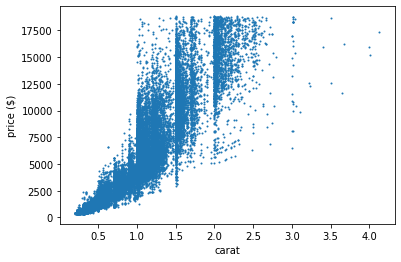

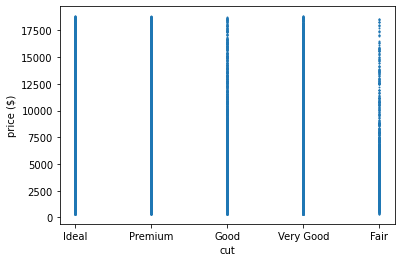

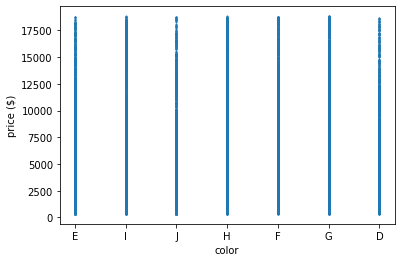

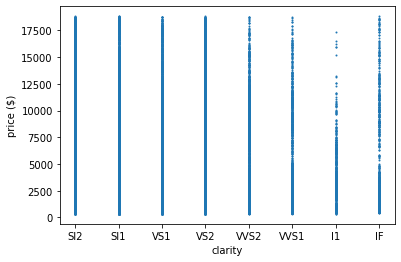

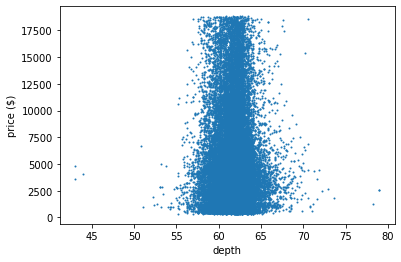

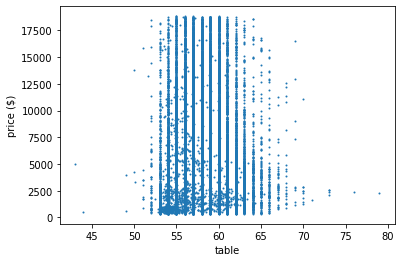

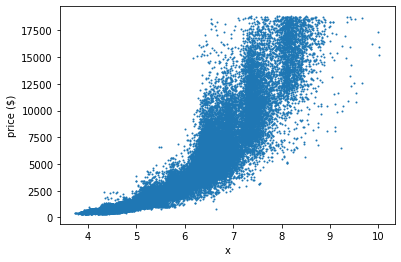

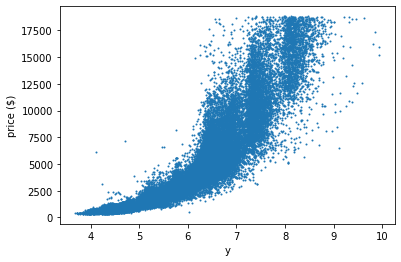

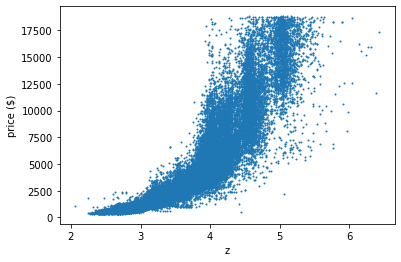

In [5]:
y = diamonds_df['price']
df_no_price = diamonds_df.drop(['price'],1)

figurecount = plotFeatureAgainstY(df_no_price, y, "price ($)")

As we can see above, there are quite a few features that show an exponential relationship.

The next thing we need to look at is the relationships between price and every other feature. Before we do this however, we will need to encode the categorical data we have for this dataset. cut, clarity and color are the features we will be focusing in this scenario. While one-hot encoding is very much possible however, we cannot rely on this method as it will create a significant number of additional columns in our dataset, thus slowing the computation time. The ideal scenario would be to use integer encoding however before doing so, we will need to ensure that the categories represent a natural ordering. In order to do this, we will compose a relationship between each categorical feature and the mean price

In [6]:
print(diamonds_df.groupby('clarity')['price'].mean().sort_values())
print('\n')
print(diamonds_df.groupby('cut')['price'].mean().sort_values())
print('\n')
print(diamonds_df.groupby('color')['price'].mean().sort_values())

clarity
VVS1    2519.512315
IF      2864.839106
VVS2    3283.737071
VS1     3838.865189
I1      3871.776871
VS2     3922.866819
SI1     3992.865697
SI2     5059.661694
Name: price, dtype: float64


cut
Ideal        3456.343390
Good         3926.403509
Very Good    3981.830629
Fair         4334.547323
Premium      4578.358252
Name: price, dtype: float64


color
E    3076.967739
D    3168.106436
F    3723.837982
G    3996.876551
H    4479.375121
I    5087.387894
J    5314.587313
Name: price, dtype: float64


Now that we can observe a tendency in all of the values, we can carry out integer encoding.

In [7]:
#Mapping for replacing the non-numerical values
cut_mapping = {'Ideal':0,
                'Good':1,
                'Very Good':2,
                'Fair':3,
                'Premium':4}

color_mapping = {'E':0, 
                  'D':1, 
                  'F':2, 
                  'G':3, 
                  'H':4, 
                  'I':5, 
                  'J':6,}

clarity_mapping = {'VVS1':0, 
                    'IF':1, 
                    'VVS2':2, 
                    'VS1':3, 
                    'I1':4,
                    'VS2':5, 
                    'SI1':6, 
                    'SI2':7}

diamonds_df = diamonds_df.replace({'cut':cut_mapping})
diamonds_df = diamonds_df.replace({'color':color_mapping})
diamonds_df = diamonds_df.replace({'clarity':clarity_mapping})

Now we have everything that we need to create a heatmap for our correlations.

<AxesSubplot:>

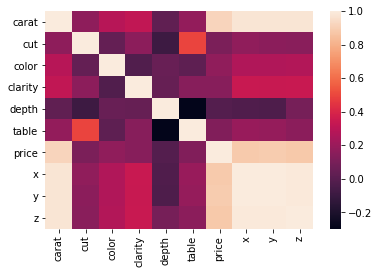

In [8]:
plt.figure(100)
sns.heatmap(diamonds_df.corr(method="pearson"))

# Further analytics

Let's have a look at some details about our data. Here are some histograms showing the number or diamonds at each price-point, colour, cut and clarity. 

(array([ 3654.,  1790.,  5066.,  8167.,   735., 12254., 13060.,  9184.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <BarContainer object of 8 artists>)

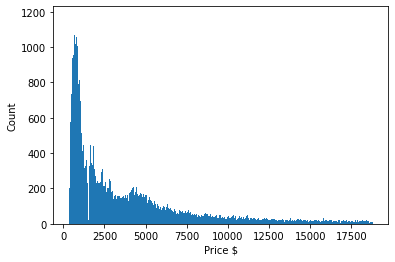

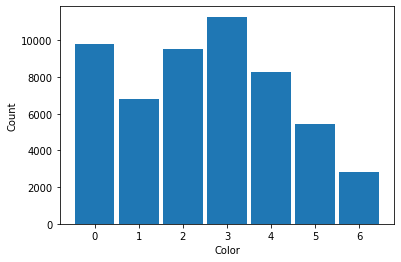

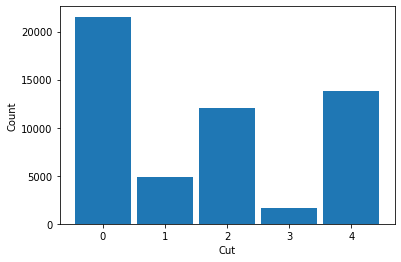

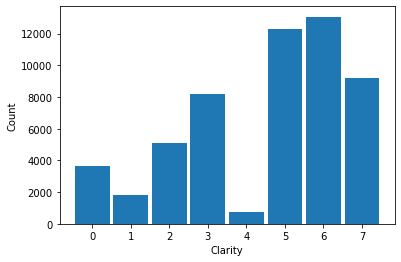

In [9]:
plt.figure(0)
plt.xlabel("Price $")
plt.ylabel("Count")
plt.hist(diamonds_df['price'].values.tolist(), bins = 500)

plt.figure(1)
plt.xticks(range(7))
plt.xlabel("Color")
plt.ylabel("Count")
plt.hist(diamonds_df['color'].values.tolist(), bins=range(8), align='left', rwidth=0.9)

plt.figure(2)
plt.xticks(range(5))
plt.xlabel("Cut")
plt.ylabel("Count")
plt.hist(diamonds_df['cut'].values.tolist(), bins=range(6), align='left', rwidth=0.9)

plt.figure(3)
plt.xticks(range(8))
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.hist(diamonds_df['clarity'].values.tolist(),bins=range(9), align='left', rwidth=0.9)

A worrying aspect of these histograms is that there is a low count of diamonds of clarity 4 and cut 3 respectively.